### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 8
### Due: Friday, Apr 11th at 11.59pm CT
---

## Only one problem this week

1. Use the following code snippet to read in SDSS galaxy color data.

<!--```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```-->

`data = np.load('../hw_data/hw8_data_1.npy')`

This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.


4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*


5. Repeat (4) for Quadratic Discriminant Analysis. 


6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.


7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 


8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 


9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 


10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
#Part.1
# Load the data
data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw8_data_1.npy")

# Find and Print Column names 
print("Column names:", data.dtype.names)

# Create color arrays for Redshift and spectral class
u_g = data['u'] - data['g']
g_r = data['g'] - data['r']
r_i = data['r'] - data['i']
i_z = data['i'] - data['z']

#Count how many regular galaxies and quasars

unique, counts = np.unique(data['specClass'], return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts:", class_counts)

Column names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
Class counts: {'GALAXY': 42808, 'QSO': 7192}


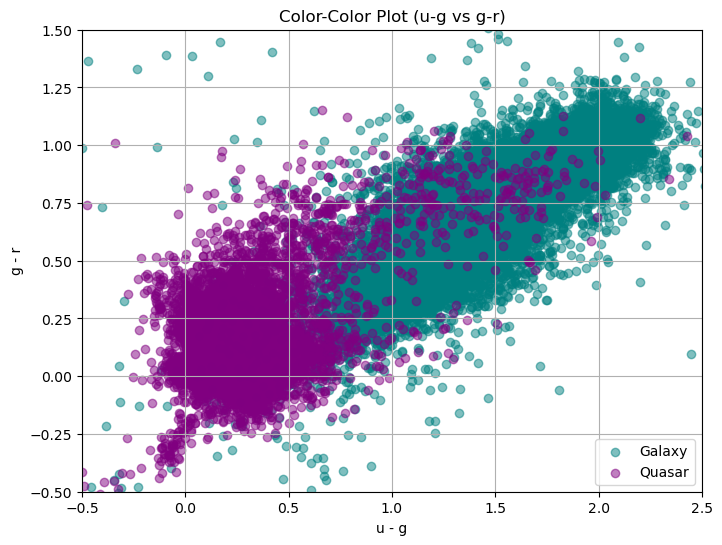

In [14]:
#Part.2

# Make a scatter plot
# (u-g0) vs (g-r) 
# Color Coding by galaxy or quasar class

is_gal = data['specClass'] == 'GALAXY'
is_qua = data['specClass'] == 'QSO'

#Plot
plt.figure(figsize=(8, 6))
plt.scatter(u_g[is_gal], g_r[is_gal], c='teal', label='Galaxy', alpha=0.5)
plt.scatter(u_g[is_qua], g_r[is_qua], c='purple', label='Quasar', alpha=0.5)
plt.xlabel('u - g')
plt.ylabel('g - r')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.5)
plt.legend()
plt.title('Color-Color Plot (u-g vs g-r)')
plt.grid(True)
plt.show()

In [13]:
#Part.3 

# Stack features: 4 colors + redshift
X = np.vstack((u_g, g_r, r_i, i_z, data['redshift'])).T

# Create binary target array: 0 = GALAXY, 1 = QSO
y = np.where(data['specClass'] == 'QSO', 1, 0)

#Perform a train-test
#Spilt taking 20% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

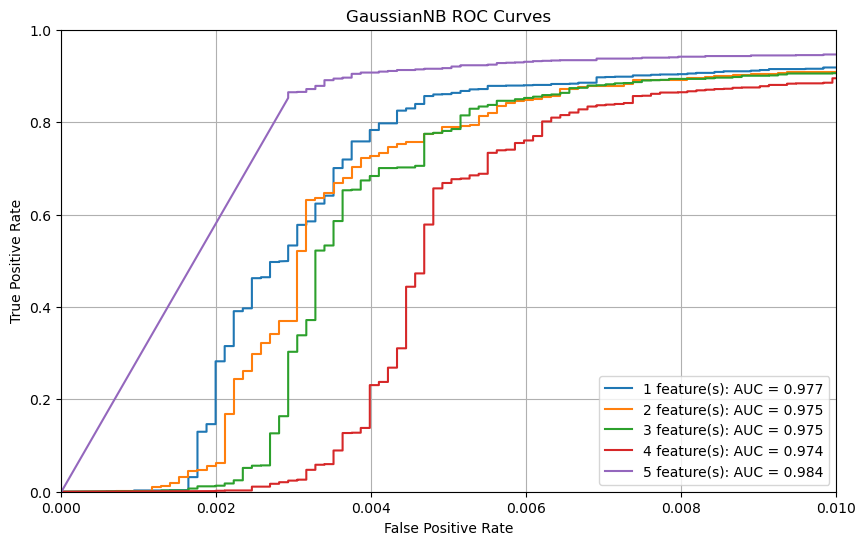

In [18]:
#Part.4 
feat_nam = ['u-g', 'g-r', 'r-i', 'i-z', 'redshift']

#Setting figure size 
plt.figure(figsize=(10, 6))

#Creation of For loop to iterate over the fitting of a Gaussian Naive Bayes 

for i in range(1, 6):
    clf = GaussianNB()
    clf.fit(X_train[:, :i], y_train)
    y_score = clf.predict_proba(X_test[:, :i])[:, clf.classes_.tolist().index(1)]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{i} feature(s): AUC = {roc_auc:.3f}')

#Plotting

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GaussianNB ROC Curves")
plt.xlim(0, 0.01)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show() 

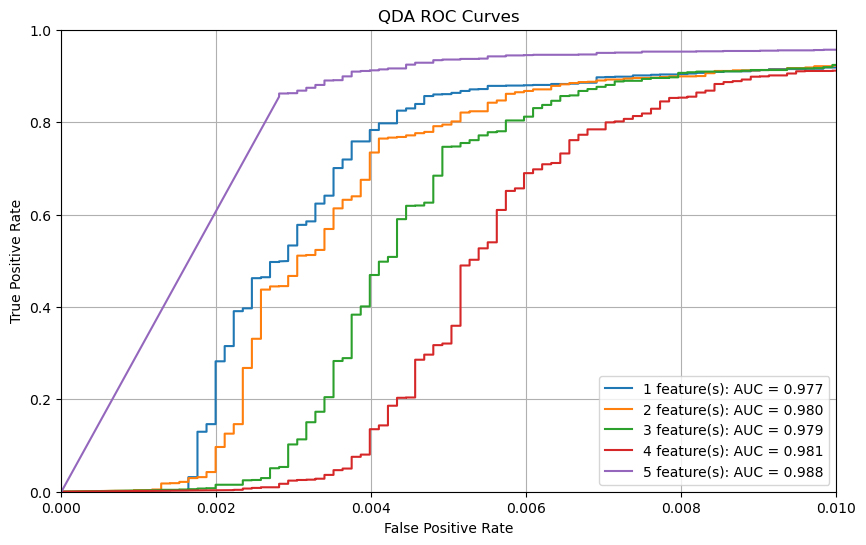

In [34]:
#Part.5
#Setting figure size 
plt.figure(figsize=(10, 6))

#Creation of For loop to iterate over the fitting for Quadratic Discriminant Analysis
for i in range(1, 6):
    clf = QDA()
    clf.fit(X_train[:, :i], y_train)
    y_score = clf.predict_proba(X_test[:, :i])[:, clf.classes_.tolist().index(1)]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{i} feature(s): AUC = {roc_auc:.3f}')
    
#Plotting graphs
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("QDA ROC Curves")
plt.xlim(0, 0.01)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

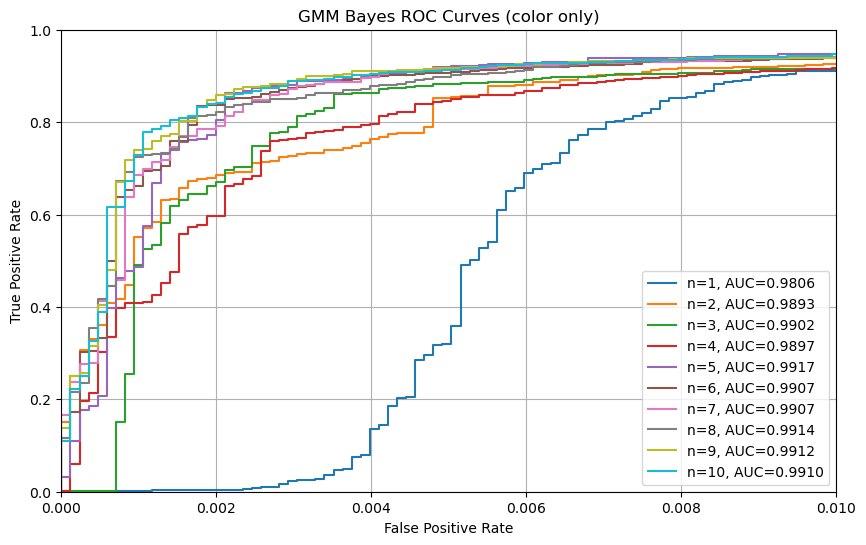

Best GMM Bayes performance with n = 5


In [38]:
#Part.6
#Restriction to only have 4 colors for training and testing
colors_only = X[:, :4]  
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(colors_only, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
best_auc = 0
best_n = None

#
for n_components in range(1, 11):
    gm0 = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gm1 = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)

    gm0.fit(X_train_c[y_train_c == 0])
    gm1.fit(X_train_c[y_train_c == 1])

#Computation of  ln-likelihood for each class
    ll0 = gm0.score_samples(X_test_c)
    ll1 = gm1.score_samples(X_test_c)

    y_score = ll1 - ll0  

    fpr, tpr, _ = roc_curve(y_test_c, y_score)
    roc_auc = auc(fpr, tpr)

    if roc_auc > best_auc:
        best_auc = roc_auc
        best_n = n_components

    plt.plot(fpr, tpr, label=f'n={n_components}, AUC={roc_auc:.4f}')
    
#Plotting roc cruves 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GMM Bayes ROC Curves (color only)")
plt.xlim(0, 0.01)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

print("Best GMM Bayes performance with n =", best_n)


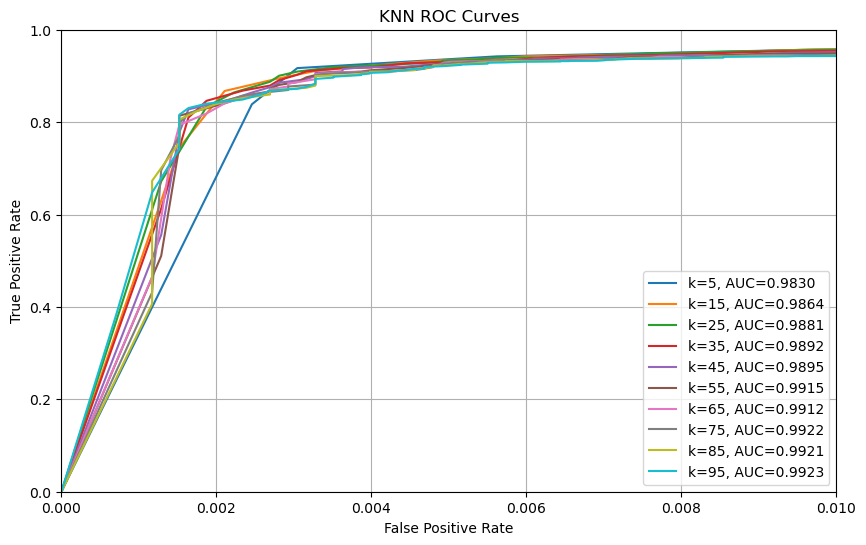

Best KNN performance with k = 95


In [24]:
#Part.7 
#Setting figure size
plt.figure(figsize=(10, 6))
best_k = None
best_auc = 0

#For loop for K- nearest neighbor classification
#looping over maximum tree depth

for k in range(5, 101, 10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_c, y_train_c)
    y_score = clf.predict_proba(X_test_c)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_c, y_score)
    roc_auc = auc(fpr, tpr)

    if roc_auc > best_auc:
        best_auc = roc_auc
        best_k = k

    plt.plot(fpr, tpr, label=f'k={k}, AUC={roc_auc:.4f}')
    
#Plotting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curves")
plt.xlim(0, 0.01)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

print("Best KNN performance with k =", best_k)



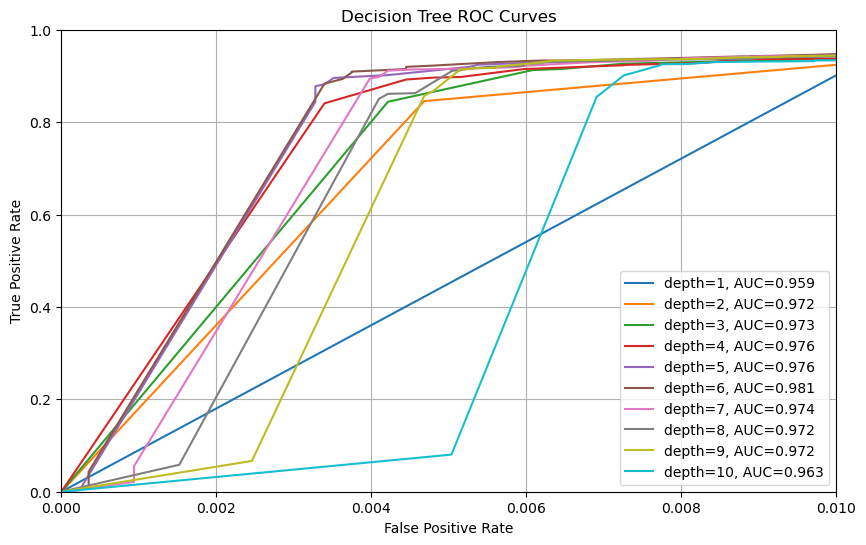

Best Decision Tree depth = 6


In [39]:
#Part.8

plt.figure(figsize=(10, 6))
best_d = None
best_auc = 0

# Decision tree classification
#For range between 1 and 10
for d in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(X_train_c, y_train_c)
    y_score = clf.predict_proba(X_test_c)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_c, y_score)
    roc_auc = auc(fpr, tpr)

    if roc_auc > best_auc:
        best_auc = roc_auc
        best_d = d

    plt.plot(fpr, tpr, label=f'depth={d}, AUC={roc_auc:.3f}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curves")
plt.xlim(0, 0.01)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

print("Best Decision Tree depth =", best_d)


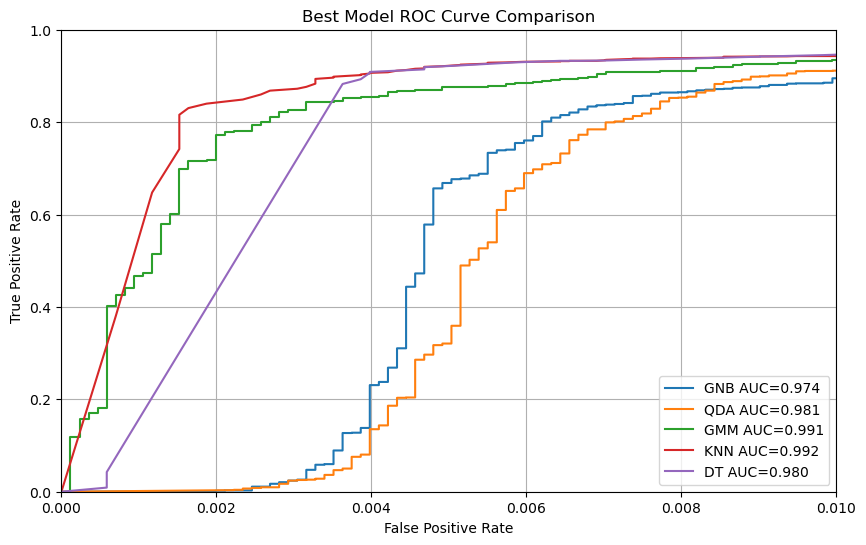

In [35]:
#Part.9 
# GNB with 4 colors
# Gaussian Naive Bayes Classification
gnb = GaussianNB().fit(X_train_c, y_train_c)
gnb_score = gnb.predict_proba(X_test_c)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_c, gnb_score)
auc_gnb = auc(fpr_gnb, tpr_gnb)

#Quadratic Discriminant Analysis
qda = QDA().fit(X_train_c, y_train_c)
qda_score = qda.predict_proba(X_test_c)[:, 1]
fpr_qda, tpr_qda, _ = roc_curve(y_test_c, qda_score)
auc_qda = auc(fpr_qda, tpr_qda)

#Gaussian Mixture Model
gm0 = GaussianMixture(n_components=best_n).fit(X_train_c[y_train_c == 0])
gm1 = GaussianMixture(n_components=best_n).fit(X_train_c[y_train_c == 1])
gmm_score = gm1.score_samples(X_test_c) - gm0.score_samples(X_test_c)
fpr_gmm, tpr_gmm, _ = roc_curve(y_test_c, gmm_score)
auc_gmm = auc(fpr_gmm, tpr_gmm)

# K-Nearest Neighbors 
knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train_c, y_train_c)
knn_score = knn.predict_proba(X_test_c)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_c, knn_score)
auc_knn = auc(fpr_knn, tpr_knn)

# Decision Tree Classification
dt = DecisionTreeClassifier(max_depth=best_d).fit(X_train_c, y_train_c)
dt_score = dt.predict_proba(X_test_c)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_c, dt_score)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot comparing all the models we used in parts 4-8
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f'GNB AUC={auc_gnb:.3f}')
plt.plot(fpr_qda, tpr_qda, label=f'QDA AUC={auc_qda:.3f}')
plt.plot(fpr_gmm, tpr_gmm, label=f'GMM AUC={auc_gmm:.3f}')
plt.plot(fpr_knn, tpr_knn, label=f'KNN AUC={auc_knn:.3f}')
plt.plot(fpr_dt, tpr_dt, label=f'DT AUC={auc_dt:.3f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Best Model ROC Curve Comparison")
plt.xlim(0, 0.01)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


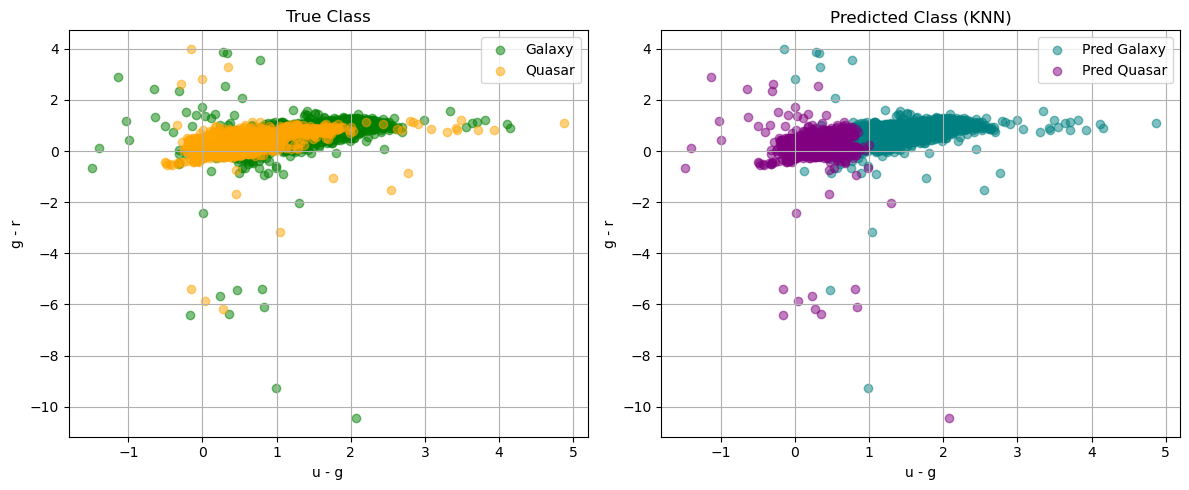

In [37]:
#Part.10 
#Two-Plot Panel (Left and Right)
# Predict on training data

train_pred = knn.predict(X_train_c)
is_quasar_true = y_train_c == 1
is_quasar_pred = train_pred == 1

plt.figure(figsize=(12, 5))

# Left panel: color-coded training data in (u-g) verse (g-r)
plt.subplot(1, 2, 1)
plt.scatter(X_train_c[~is_quasar_true][:, 0], X_train_c[~is_quasar_true][:, 1], c='green', label='Galaxy', alpha=0.5)
plt.scatter(X_train_c[is_quasar_true][:, 0], X_train_c[is_quasar_true][:, 1], c='orange', label='Quasar', alpha=0.5)
plt.title("True Class")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.legend()
plt.grid(True)

# Right panel: Predicted class from the tuned bestperforming classifier 

plt.subplot(1, 2, 2)
plt.scatter(X_train_c[~is_quasar_pred][:, 0], X_train_c[~is_quasar_pred][:, 1], c='teal', label='Pred Galaxy', alpha=0.5)
plt.scatter(X_train_c[is_quasar_pred][:, 0], X_train_c[is_quasar_pred][:, 1], c='purple', label='Pred Quasar', alpha=0.5)
plt.title("Predicted Class (KNN)")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Part of the code for part 10 was formulated using the help of AI. When I did the code it wasn't running and after debugging i was still having some issues. Used the Help of AI to debug the code. 